## Tema 2. Señales y Sistemas Discretos.

Emplearemos la librería ``numpy`` para cálculo numérico.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Secuencias

Definimos una secuencia:

In [4]:
k = [0,1,2,3,4,5,6,7,8,9]
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Una secuencia definida de este modo no es práctica a la hora de realizar operaciones, por ejemplo:

In [19]:
print(k*3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Emplearemos objetos de tipo ``array`` que nos permiten operar con secuencias. Por ejemplo creamos los primeros 10 elementos de la secuencia:

In [10]:
k2 = np.arange(0,10)
k2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
print(k2*3)

[ 0  3  6  9 12 15 18 21 24 27]


De este modo es posible realizar operaciones con la secuencia aplicando funciones, por ejemplo la exponencial:

In [20]:
y = 1 + 0.5**k2 - 0.3**(2*k2)
print(y)

[1.         1.41       1.2419     1.124271   1.06243439 1.0312441
 1.01562447 1.00781245 1.00390625 1.00195312]


Es posible retrasar la secuencia empleando ``pad``:

In [22]:
np.pad(y,(2,0))

array([0.        , 0.        , 1.        , 1.41      , 1.2419    ,
       1.124271  , 1.06243439, 1.0312441 , 1.01562447, 1.00781245,
       1.00390625, 1.00195312])

### Ecuaciones en diferencias

In [30]:
def equation(u):
    # y(k) = y(k-1) + 2*u(k-1)
    y = [0] 
    for i in u:
        y.append( y[-1] + 2*i )
    return( np.array(y) )
    
equation( [1,1,1,1,1] )

array([ 0,  2,  4,  6,  8, 10])

### Muestreo y reconstrucción

In [36]:
def system(u):
    y = []
    yk1 = 0
    yk2 = 0
    for i in np.arange(0,len(u)):
        yk1 = np.pad(y,1)[i]
        yk2 = np.pad(y,2)[i]
        y.append( 1.73*yk1 - 0.84*yk2 + u[i] )
    return( np.array(y) )

y = system( [1]*100 )

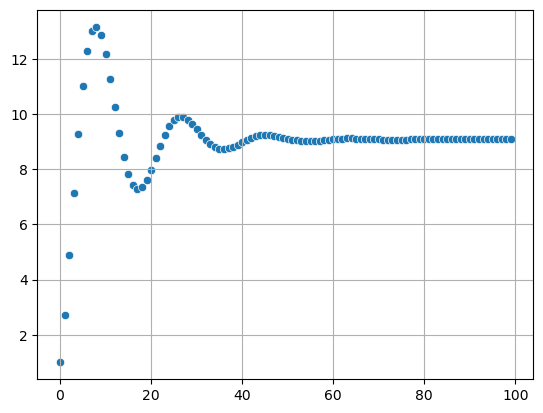

In [41]:
t = np.arange(0,len(y))
ax = sns.scatterplot(x=t,y=y)
ax.grid()